##### The cell below is for you to keep track of the libraries used and install those libraries quickly
##### Ensure that the proper library names are used and the syntax of `%pip install PACKAGE_NAME` is followed

In [3]:
%pip install pandas 
%pip install matplotlib
%pip install missingno
%pip install -U scikit-learn
# add commented pip installation lines for packages used as shown above for ease of testing
# the line should be of the format %pip install PACKAGE_NAME 

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## **DO NOT CHANGE** the filepath variable
##### Instead, create a folder named 'data' in your current working directory and 
##### have the .csv file inside that. A relative path *must* be used when loading data into pandas

In [4]:
# Can have as many cells as you want for code
import pandas as pd
import missingno as msno
import datetime
filepath = "./data/catA_train.csv" 
# the initialised filepath MUST be a relative path to a folder named data that contains the parquet file

### **ALL** Code for machine learning and dataset analysis should be entered below. 
##### Ensure that your code is clear and readable.
##### Comments and Markdown notes are advised to direct attention to pieces of code you deem useful.

### Section 0: Data Information
##### placeholder text

In [5]:
# assigning dataset into variable
data = pd.read_csv(filepath)

In [6]:
# 29182 rows, 28 columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29182 entries, 0 to 29181
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   LATITUDE                             29062 non-null  float64
 1   LONGITUDE                            29062 non-null  float64
 2   AccountID                            29182 non-null  object 
 3   Company                              29182 non-null  object 
 4   SIC Code                             29182 non-null  float64
 5   Industry                             29182 non-null  object 
 6   8-Digit SIC Code                     29182 non-null  float64
 7   8-Digit SIC Description              29182 non-null  object 
 8   Year Found                           28748 non-null  float64
 9   Entity Type                          29182 non-null  object 
 10  Parent Company                       28668 non-null  object 
 11  Parent Country              

In [7]:
# basic dataset information
data.describe()

,LATITUDE,LONGITUDE,SIC Code,8-Digit SIC Code,Year Found,Square Footage,Employees (Single Site),Employees (Domestic Ultimate Total),Employees (Global Ultimate Total),Sales (Domestic Ultimate Total USD),Sales (Global Ultimate Total USD),Is Domestic Ultimate,Is Global Ultimate
count,29062.000000,29062.000000,29182.000000,2.918200e+04,28748.000000,0.0,16779.000000,29103.000000,2.640800e+04,2.918200e+04,2.918200e+04,29182.000000,29182.000000
mean,1.320677,103.843324,6169.271160,6.169092e+07,2004.505913,NaN,36.856189,139.764182,6.994665e+03,7.520992e+08,3.931771e+09,0.500069,0.257248
std,0.043740,0.053757,1705.845535,1.705778e+07,13.464238,NaN,173.334420,1118.939249,4.539462e+04,1.019636e+10,2.184589e+10,0.500009,0.437125
min,1.238792,103.611319,132.000000,1.320000e+06,1819.000000,NaN,1.000000,1.000000,1.000000e+00,-1.502631e+08,1.000000e+00,0.000000,0.000000
25%,1.284665,103.831874,5084.000000,5.084000e+07,1997.000000,NaN,10.000000,4.000000,4.000000e+00,1.026308e+06,1.026308e+06,0.000000,0.000000
50%,1.309701,103.848989,6719.000000,6.719000e+07,2008.000000,NaN,16.000000,16.000000,1.500000e+01,2.606644e+06,3.259582e+06,1.000000,0.000000
75%,1.337889,103.865922,7311.000000,7.311000e+07,2014.000000,NaN,29.000000,60.000000,1.000000e+02,2.176969e+07,1.482258e+08,1.000000,1.000000
max,1.469800,104.003218,9721.000000,9.721990e+07,2023.000000,NaN,12000.000000,80000.000000,2.190000e+06,3.184764e+11,5.140000e+11,1.000000,1.000000


In [8]:
# number of duplicate rows
data.duplicated().sum()

0

### Section 1: Data Preparation
##### placeholder text

#### Section 1.1: Making Things Convenient

In [9]:
# drop 1: removing mostly irrelevant and high-NaN columns
columns_to_drop = ['AccountID','Square Footage','Import/Export Status', 'Fiscal Year End','Company Description']
data = data.drop(columns = columns_to_drop)
data.columns

Index(['LATITUDE', 'LONGITUDE', 'Company', 'SIC Code', 'Industry',
       '8-Digit SIC Code', '8-Digit SIC Description', 'Year Found',
       'Entity Type', 'Parent Company', 'Parent Country', 'Ownership Type',
       'Company Status (Active/Inactive)', 'Employees (Single Site)',
       'Employees (Domestic Ultimate Total)',
       'Employees (Global Ultimate Total)',
       'Sales (Domestic Ultimate Total USD)',
       'Sales (Global Ultimate Total USD)', 'Global Ultimate Company',
       'Global Ultimate Country', 'Domestic Ultimate Company',
       'Is Domestic Ultimate', 'Is Global Ultimate'],
      dtype='object')

In [10]:
# noticed 'Industry' and '8-Digit SIC Description' have tailing strings: ', nec' and 'Not Elsewhere Classified'
# which can be redundant, decided to put into a separate column 'NEC'
data.insert(loc = 4, column = 'NEC', value = None)
data['NEC'] = data['Industry'].str.contains(', Not Elsewhere Classified')
data['Industry'] = data['Industry'].str.replace(', Not Elsewhere Classified', '').str.strip()
data['8-Digit SIC Description'] = data['8-Digit SIC Description'].str.replace(', nec', '').str.strip()

In [11]:
# also noticed using the actual company age might be more convenient as compared to using the specific year
current_year = datetime.date.today().year
data.insert(loc = 5, column = 'Age', value = None)
data['Age'] = current_year - data['Year Found']
data = data.drop(columns = 'Year Found')

In [12]:
# not sure if this is correct to do, removed the company names to anonymize
columns_to_drop = ['Company', 'Parent Company', 'Global Ultimate Company', 'Domestic Ultimate Company']
data = data.drop(columns = columns_to_drop)

In [13]:
# converting previously boolean column represented as int to be represented as boolean
columns_to_convert = ['Is Domestic Ultimate', 'Is Global Ultimate']
data[columns_to_convert] = data[columns_to_convert].apply(lambda x: x.astype(bool))

In [14]:
# counting columns containing NaNs
nan_cols = data.isna().sum()
nan_counts = {}
for col, cnt in nan_cols.items():
    if cnt > 0: nan_counts[col] = cnt
nan_counts

{'LATITUDE': 120,
 'LONGITUDE': 120,
 'Age': 434,
 'Parent Country': 520,
 'Employees (Single Site)': 12403,
 'Employees (Domestic Ultimate Total)': 79,
 'Employees (Global Ultimate Total)': 2774,
 'Global Ultimate Country': 523}

#### Section 1.2: Removing Null-Values

<AxesSubplot:>

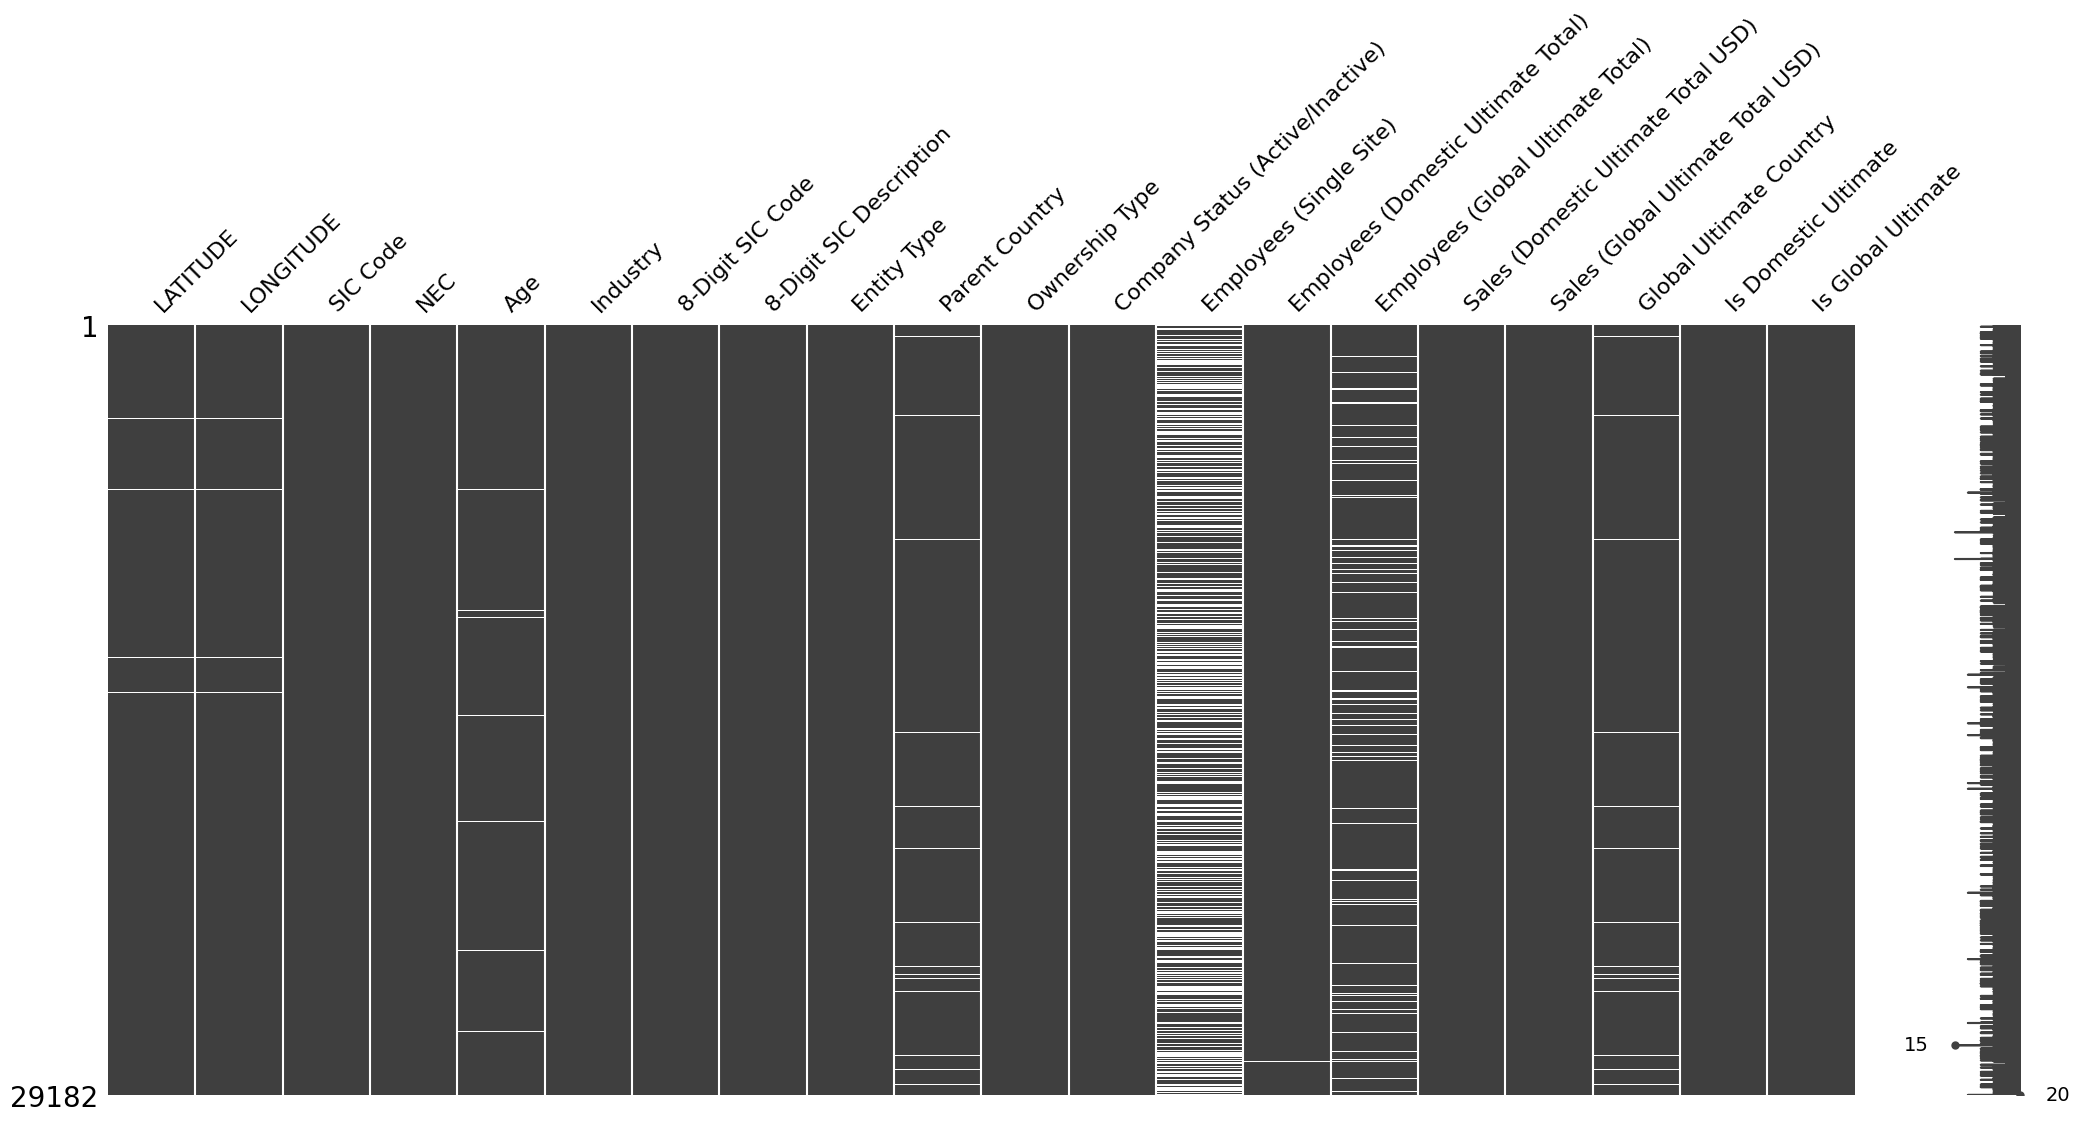

In [15]:
# diagnosing missingness
msno.matrix(data)

In [16]:
# Removing columns with NaNs, but with rows that are little in number 
# Did not remove NaNs from 'Employees (Single Site)' because too much data will be lost 
data = data.dropna(subset=['8-Digit SIC Description', 'Parent Country', 'Employees (Domestic Ultimate Total)', 'Employees (Global Ultimate Total)', 'Global Ultimate Country', 'LATITUDE', 'LONGITUDE', 'Age'])     

In [17]:
# Replace NaNs in 'Employees (Single Site)' with median
single_site_employees_median = data['Employees (Single Site)'].median(skipna=True)
data['Employees (Single Site)'] = data['Employees (Single Site)'].fillna(single_site_employees_median)
data.isna().sum()

LATITUDE                               0
LONGITUDE                              0
SIC Code                               0
NEC                                    0
Age                                    0
Industry                               0
8-Digit SIC Code                       0
8-Digit SIC Description                0
Entity Type                            0
Parent Country                         0
Ownership Type                         0
Company Status (Active/Inactive)       0
Employees (Single Site)                0
Employees (Domestic Ultimate Total)    0
Employees (Global Ultimate Total)      0
Sales (Domestic Ultimate Total USD)    0
Sales (Global Ultimate Total USD)      0
Global Ultimate Country                0
Is Domestic Ultimate                   0
Is Global Ultimate                     0
dtype: int64

In [18]:
from sklearn.preprocessing import LabelEncoder
# Use label encoding for 'SIC Code'
label_encoder = LabelEncoder()
data['SIC Code'] = label_encoder.fit_transform(data['SIC Code'])
data["SIC Code"].unique()

array([275, 457, 306,  55, 495, 134, 114, 459, 500, 409, 506, 291, 475,
       246, 563,  22, 554, 456, 263, 335, 367, 562, 566, 463, 345,  61,
         8, 277, 410, 141, 487, 472, 299, 330, 236, 280, 310, 395, 362,
       338, 454, 526, 453, 260, 349, 533, 337, 146, 182, 318, 449, 271,
       248, 428,  87, 490, 417, 509,  40, 294, 288, 549, 460, 558, 346,
       434, 279, 464, 369, 116, 180, 512, 448, 485, 309, 315, 511, 220,
       371, 143, 356, 564, 110, 300, 482, 328, 314, 189, 575, 532, 375,
       323, 322, 544, 113, 272, 205, 431, 370,  99, 321, 373, 441, 462,
       489, 255,  88, 387, 401, 222,  17,  25, 499, 458, 209, 450, 492,
       545, 331, 327, 169, 422, 254, 214, 339, 524, 424, 514, 540, 553,
       226, 249, 130, 432,  26, 559,  11,  54, 407, 283, 265, 567,  84,
       479, 525, 224, 340, 413,  42, 194, 250, 496, 207,  92, 543, 366,
       185, 135, 484,  18,  29, 461, 377, 326, 151, 481,  81, 296,  41,
       372, 320, 121, 556, 363, 535, 172, 344, 452, 388, 161, 54

### Section 2: Exploratory Data Analysis
##### placeholder text

In [19]:
# Importing different libriares for visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [20]:
# use of a correlation matrix to observe how variables in our dataset may be affected by others
numerical_df = data.select_dtypes(include=['float64', 'int64'])

# Create a correlation matrix
correlation_matrix = numerical_df.corr()

# Assuming correlation_matrix is your correlation matrix
correlation_df = pd.DataFrame(correlation_matrix)

# Print or use the correlation DataFrame as needed
correlation_df

,LATITUDE,LONGITUDE,SIC Code,Age,8-Digit SIC Code,Employees (Single Site),Employees (Domestic Ultimate Total),Employees (Global Ultimate Total),Sales (Domestic Ultimate Total USD),Sales (Global Ultimate Total USD)
LATITUDE,1.000000,-0.047114,-0.093565,0.025688,-0.087961,0.004698,0.007725,-0.008617,0.005623,-0.009691
LONGITUDE,-0.047114,1.000000,0.022762,0.006122,0.024250,-0.007794,0.012137,0.004389,-0.007463,0.003628
SIC Code,-0.093565,0.022762,1.000000,-0.199873,0.984890,-0.051134,-0.021159,0.000940,-0.007275,-0.014279
Age,0.025688,0.006122,-0.199873,1.000000,-0.198802,0.039770,0.044203,0.028188,-0.017349,0.022695
8-Digit SIC Code,-0.087961,0.024250,0.984890,-0.198802,1.000000,-0.046250,-0.021283,0.001034,-0.010527,-0.015235
Employees (Single Site),0.004698,-0.007794,-0.051134,0.039770,-0.046250,1.000000,0.127266,0.008901,0.003133,0.004904
Employees (Domestic Ultimate Total),0.007725,0.012137,-0.021159,0.044203,-0.021283,0.127266,1.000000,0.016121,0.015615,0.010377
Employees (Global Ultimate Total),-0.008617,0.004389,0.000940,0.028188,0.001034,0.008901,0.016121,1.000000,-0.004174,0.648946
Sales (Domestic Ultimate Total USD),0.005623,-0.007463,-0.007275,-0.017349,-0.010527,0.003133,0.015615,-0.004174,1.000000,0.109128
Sales (Global Ultimate Total USD),-0.009691,0.003628,-0.014279,0.022695,-0.015235,0.004904,0.010377,0.648946,0.109128,1.000000


In [21]:
# Convert Sales to Billions
gsales = data['Sales (Global Ultimate Total USD)']/1000000000
gsales.head()
dsales = data['Sales (Domestic Ultimate Total USD)']/1000000000
dsales.head()

1     7.093536
2     0.001026
3    73.398976
4     0.000432
5     0.001026
Name: Sales (Domestic Ultimate Total USD), dtype: float64

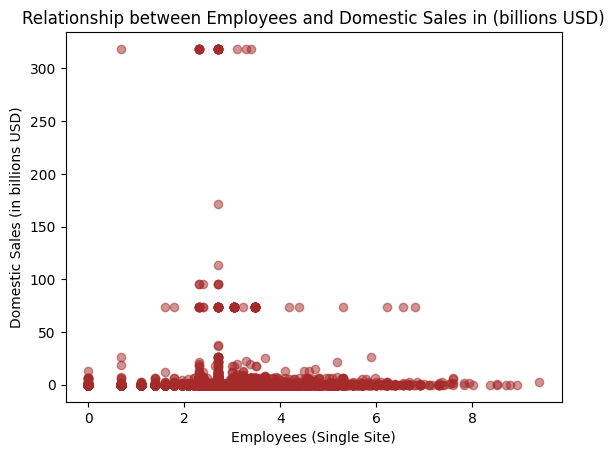

In [22]:
# Relationship between Employees and Domestic Sales in billions USD
emply = np.log(data['Employees (Single Site)']) # log transformation to reduce skewness

plt.scatter(emply, dsales, color= 'brown', alpha=0.5) 
plt.xlabel('Employees (Single Site)')
plt.ylabel('Domestic Sales (in billions USD)')
plt.title('Relationship between Employees and Domestic Sales in (billions USD)')
plt.show()

# Generally, lower number of employees are associated with higher domestic sales

In [23]:
# Visulization
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import LogNorm

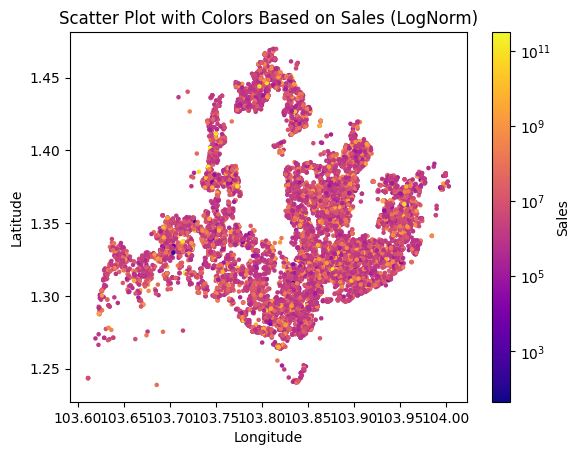

In [24]:
# Location vs Domestic Sales 

# Use LogNorm for more sensitivity to numerical changes
norm = LogNorm()
cmap = 'plasma'
scatter = plt.scatter(data['LONGITUDE'], data['LATITUDE'], c=data['Sales (Domestic Ultimate Total USD)'], cmap=cmap, s=5, norm=norm)
cbar = plt.colorbar(scatter, label='Sales')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot with Colors Based on Sales (LogNorm)')
plt.show()

# Comments: Most of the domestic sales are concentrated in the east of Singapore, with a few outliers in the west.


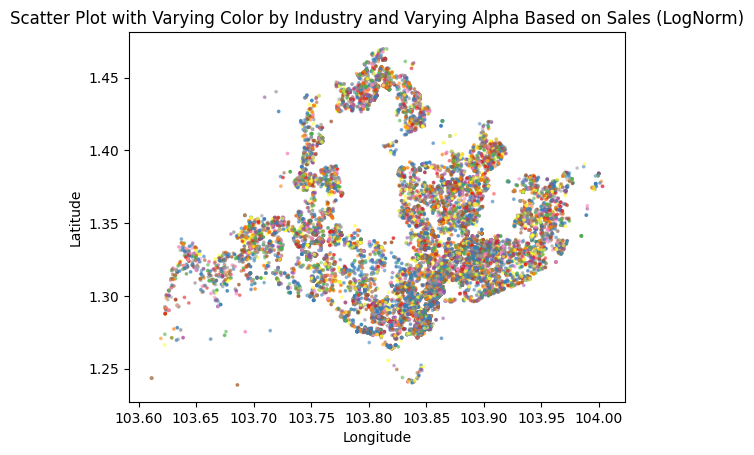

In [25]:
# Industry vs Domestic Sales

norm = LogNorm()
# Define a constant color (e.g., blue)
constant_color = 'blue'

# Define a color palette based on unique industries
industry_palette = sns.color_palette('Set1', n_colors=len(data['Industry'].unique()))

# Create a dictionary to map Industry to a unique color
industry_colors = dict(zip(data['Industry'].unique(), industry_palette))

# Scatter plot with varying color by Industry and varying alpha based on Sales values
scatter = plt.scatter(data['LONGITUDE'], data['LATITUDE'], c=data['Industry'].map(industry_colors), s=3, alpha=norm(data['Sales (Domestic Ultimate Total USD)']))

# Add a legend for Industry
legend_labels = data['Industry'].unique()
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=industry, markerfacecolor=industry_colors[industry], markersize=4) for industry in legend_labels]

# Set labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot with Varying Color by Industry and Varying Alpha Based on Sales (LogNorm)')

# Show the plot
plt.show()

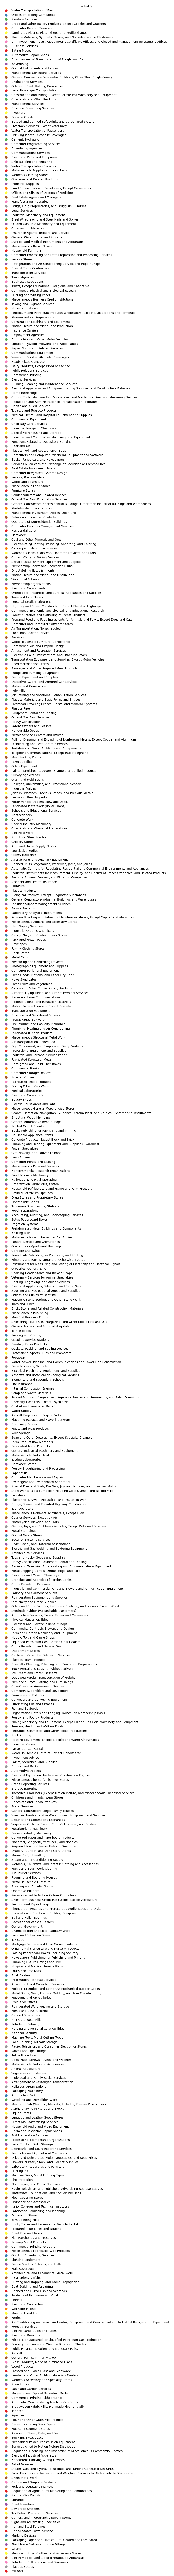

In [26]:
# Legends for the Scatterplot above:

fig, ax = plt.subplots()
# Create legend handles
legend_labels = data['Industry'].unique()
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=industry, markerfacecolor=industry_colors[industry], markersize=10) for industry in legend_labels]

# Add the legend to the figure
ax.legend(handles=legend_handles, title='Industry', prop={'size': 10}, bbox_to_anchor=(1, 1), frameon= False)

# Hide the axes
ax.axis('off')

# Remove gridlines
ax.grid(False)

# Show the figure
plt.show()

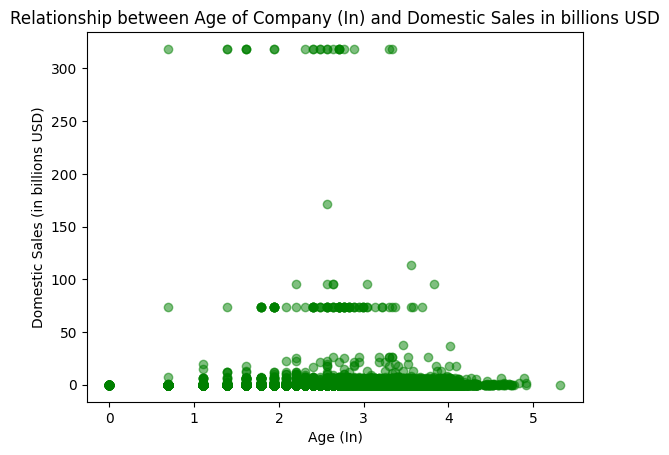

In [27]:
# Age vs Domestic Sales

# Check max age of companies
data['Age'].max()
# Check min age of companies
data['Age'].min()
# Check median age of companies 
data['Age'].median()

plt.scatter(np.log(data['Age']), dsales, color= 'green', alpha=0.5)
plt.xlabel('Age (In)')
plt.ylabel('Domestic Sales (in billions USD)')
plt.title('Relationship between Age of Company (In) and Domestic Sales in billions USD')
plt.show()

# Comments: Companies aged between 7 and 33 years old generally have higher domestic sales

# Model Testing 

In [28]:
#Imports 
from sklearn.model_selection import train_test_split 
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import random
from sklearn import preprocessing
from io import StringIO
from sklearn.ensemble import RandomForestClassifier
from numpy.random import seed

### 1. Gradient Boosting Regressor

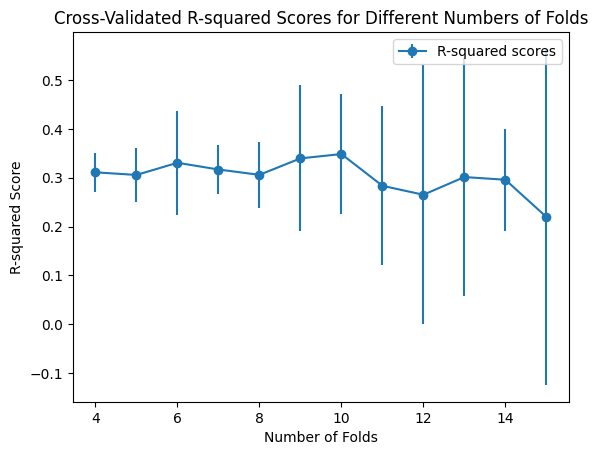

Mean CV Score: 0.21966206137272207
Decision Tree Mean Regression R2 Score:  0.30195541969008505


In [29]:
# Gradient Boosting Regression
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import GradientBoostingRegressor

# Separate features and target variable
X = data.drop(['Sales (Domestic Ultimate Total USD)', 'NEC', 'Industry', '8-Digit SIC Code', '8-Digit SIC Description','Parent Country', 'Ownership Type', 'Company Status (Active/Inactive)', 'Global Ultimate Country', 'Is Domestic Ultimate', 'Is Global Ultimate', 'Entity Type'], axis=1)
Y = data['Sales (Domestic Ultimate Total USD)']

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize the GradientBoostingRegressor
model = GradientBoostingRegressor(random_state=42)


# Lists to store results
n_folds_values = list(range(4, 16))
mean_r2_scores = []
std_r2_scores = []

# Iterate over different numbers of folds
for n_folds in n_folds_values:
    # Use k-fold cross-validation with the current number of folds
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

    # Perform cross-validation and get R-squared scores
    cv_scores = cross_val_score(model, X_train, Y_train, cv=kf, scoring='r2')

    # Append mean and standard deviation of R-squared scores to lists
    mean_r2_scores.append(cv_scores.mean())
    std_r2_scores.append(cv_scores.std())

# Plot the results
plt.errorbar(n_folds_values, mean_r2_scores, yerr=std_r2_scores, marker='o', linestyle='-', label='R-squared scores')
plt.xlabel('Number of Folds')
plt.ylabel('R-squared Score')
plt.title('Cross-Validated R-squared Scores for Different Numbers of Folds')
plt.legend()
plt.show()

print('Mean CV Score:', np.mean(cv_scores))
print("Decision Tree Mean Regression R2 Score: ", np.mean(mean_r2_scores))


### 2. Tree Decision

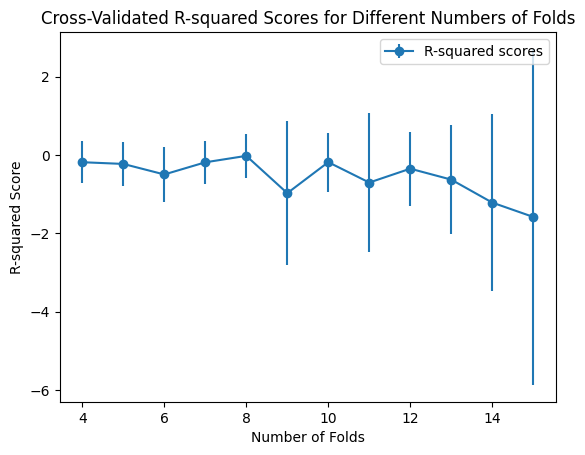

Mean CV Score: -1.5805523277389126
Decision Tree Mean Regression R2 Score:  -0.5625948505841932


In [30]:
from sklearn.tree import DecisionTreeRegressor 
# Separate features and target variable
X = data.drop(['Sales (Domestic Ultimate Total USD)', 'NEC', 'Industry', '8-Digit SIC Code', '8-Digit SIC Description','Parent Country', 'Ownership Type', 'Company Status (Active/Inactive)', 'Global Ultimate Country', 'Is Domestic Ultimate', 'Is Global Ultimate', 'Entity Type'], axis=1)
Y = data['Sales (Domestic Ultimate Total USD)']

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize the DecisionTreeRegressor
tree = DecisionTreeRegressor(criterion = 'squared_error', splitter='best', min_samples_split = 2, random_state=42).fit(X_train, Y_train)

# Lists to store results
n_folds_values = list(range(4, 16))
mean_r2_scores = []
std_r2_scores = []

# Iterate over different numbers of folds
for n_folds in n_folds_values:
    # Use k-fold cross-validation with the current number of folds
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

    # Perform cross-validation and get R-squared scores
    cv_scores = cross_val_score(tree, X_train, Y_train, cv=kf, scoring='r2')

    # Append mean and standard deviation of R-squared scores to lists
    mean_r2_scores.append(cv_scores.mean())
    std_r2_scores.append(cv_scores.std())

# Plot the results
plt.errorbar(n_folds_values, mean_r2_scores, yerr=std_r2_scores, marker='o', linestyle='-', label='R-squared scores')
plt.xlabel('Number of Folds')
plt.ylabel('R-squared Score')
plt.title('Cross-Validated R-squared Scores for Different Numbers of Folds')
plt.legend()
plt.show()

print('Mean CV Score:', np.mean(cv_scores))
print("Decision Tree Mean Regression R2 Score: ", np.mean(mean_r2_scores))

### 3. Tree Decision with Top 3 features

[0.26926136 0.18130714 0.00041278 0.12988148 0.05826653 0.13428888
 0.13447504 0.09210679]


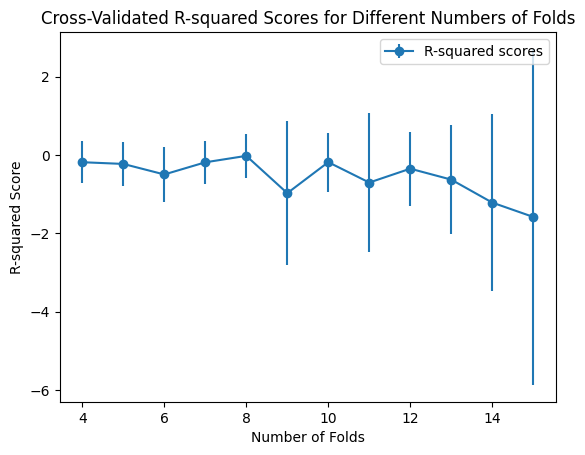

Mean CV Score: -1.5805523277389126
Decision Tree Mean Regression R2 Score:  -0.5625948505841932


In [31]:
print(tree.feature_importances_)
high_importance = ['Employees (Domestic Ultimate Total)','Employees (Global Ultimate Total)','Sales (Global Ultimate Total USD)']
X_train2 = X_train[high_importance]
X_test2 = X_test[high_importance]

#Initialize + fit model
tree2 = DecisionTreeRegressor(criterion = 'squared_error', splitter= 'best', min_samples_split = 2, random_state=42).fit(X_train2, Y_train)

# Lists to store results
n_folds_values = list(range(4, 16))
mean_r2_scores = []
std_r2_scores = []

# Iterate over different numbers of folds
for n_folds in n_folds_values:
    # Use k-fold cross-validation with the current number of folds
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

    # Perform cross-validation and get R-squared scores
    cv_scores = cross_val_score(tree, X_train, Y_train, cv=kf, scoring='r2')

    # Append mean and standard deviation of R-squared scores to lists
    mean_r2_scores.append(cv_scores.mean())
    std_r2_scores.append(cv_scores.std())

# Plot the results
plt.errorbar(n_folds_values, mean_r2_scores, yerr=std_r2_scores, marker='o', linestyle='-', label='R-squared scores')
plt.xlabel('Number of Folds')
plt.ylabel('R-squared Score')
plt.title('Cross-Validated R-squared Scores for Different Numbers of Folds')
plt.legend()
plt.show()

print('Mean CV Score:', np.mean(cv_scores))
print("Decision Tree Mean Regression R2 Score: ", np.mean(mean_r2_scores))


## The cell below is **NOT** to be removed
##### The function is to be amended so that it accepts the given input (dataframe) and returns the required output (list). 
##### It is recommended to test the function out prior to submission
-------------------------------------------------------------------------------------------------------------------------------
##### The hidden_data parsed into the function below will have the same layout columns wise as the dataset *SENT* to you
##### Thus, ensure that steps taken to modify the initial dataset to fit into the model are also carried out in the function below

In [32]:
import joblib

# Save the base model to an HDF5 file
joblib.dump(model, 'base_model.h5')

['base_model.h5']

In [35]:
def testing_hidden_data(hidden_data: pd.DataFrame) -> list:
    '''DO NOT REMOVE THIS FUNCTION.

The function accepts a dataframe as input and return an iterable (list)
of binary classes as output.

The function should be coded to test on hidden data
and should include any preprocessing functions needed for your model to perform. 
    
All relevant code MUST be included in this function.'''
    loaded_model = joblib.load('./base_model.h5')
    predictions = loaded_model.predict(pd.DataFrame)
    result = [] 
    result.append(X_test.iloc[[1]])
    
    return result

##### Cell to check testing_hidden_data function

In [36]:
# This cell should output a list of predictions.
test_df = pd.read_csv(filepath)
test_df = test_df.drop(columns=['Sales (Domestic Ultimate Total USD)'])
print(testing_hidden_data(test_df))

TypeError: '>' not supported between instances of 'property' and 'int'

### Please have the filename renamed and ensure that it can be run with the requirements above being met. All the best!